/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  from ipykernel import kernelapp as app


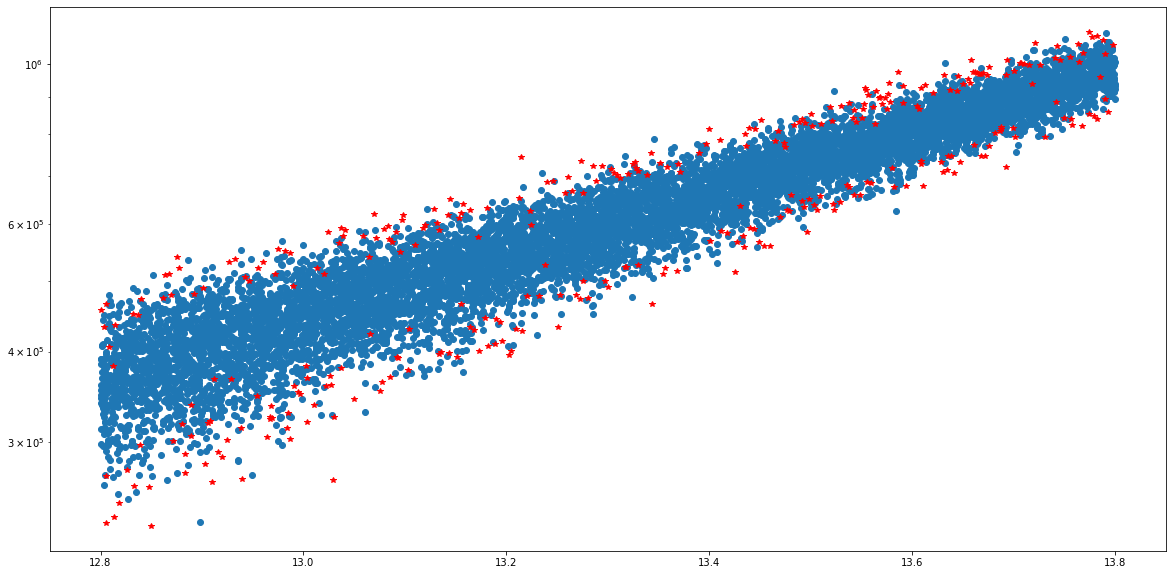

In [5]:
from scipy import stats
from scipy import polyval
import numpy as np
import matplotlib.pyplot as plt

num_data = 10000
fake_data_x = np.sort(12.8+np.random.random(num_data))
fake_data_y = np.exp(fake_data_x) + np.random.normal(0,scale=50000,size=num_data)

# Regression Function
def regress(x, y):
    #Return a tuple of predicted y values and parameters for linear regression.
    p = stats.linregress(x, y)
    b1, b0, r, p_val, stderr = p
    y_pred = polyval([b1, b0], x)
    return y_pred, p

# plotting z
xz, yz = fake_data_x, fake_data_y                            # data, non-transformed
y_pred, _ = regress(xz, np.log(yz))      # change here           # transformed input             


num_bin_intervals = 10 # approx number of averaging windows
window_boundaries = np.linspace(min(fake_data_x),max(fake_data_x),int(len(fake_data_x)/num_bin_intervals)) # window boundaries
y_good = [] # list to collect the "well-behaved" y-axis data
x_good = [] # list to collect the "well-behaved" x-axis data
y_outlier = []
x_outlier = []

for i in range(len(window_boundaries)-1):

    # create a boolean mask to select the data within the averaging window
    window_indices = (fake_data_x<=window_boundaries[i+1]) & (fake_data_x>window_boundaries[i])
    # separate the pieces of data in the window
    fake_data_x_slice = fake_data_x[window_indices]
    fake_data_y_slice = fake_data_y[window_indices]

    # calculate the mean y_value in the window
    y_mean = np.mean(fake_data_y_slice)
    y_std = np.std(fake_data_y_slice)

    # choose and select the outliers
    y_outliers = fake_data_y_slice[np.abs(fake_data_y_slice-y_mean)>=2*y_std]
    x_outliers = fake_data_x_slice[np.abs(fake_data_y_slice-y_mean)>=2*y_std]

    # choose and select the good ones
    y_goodies = fake_data_y_slice[np.abs(fake_data_y_slice-y_mean)<2*y_std]
    x_goodies = fake_data_x_slice[np.abs(fake_data_y_slice-y_mean)<2*y_std]

    # extend the lists with all the good and the bad
    y_good.extend(list(y_goodies))
    y_outlier.extend(list(y_outliers))
    x_good.extend(list(x_goodies))
    x_outlier.extend(list(x_outliers))

plt.figure(figsize = (20, 10))
# plt.figure()
plt.semilogy(x_good,y_good,'o')
plt.semilogy(x_outlier,y_outlier,'r*')
plt.show()